<a href="https://colab.research.google.com/github/gulistanburtek/machine-learning/blob/main/tez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.ensemble as ske                          # Tüm sınıflandırıcıları içeren kütüphane.
from sklearn.model_selection import train_test_split    # Veriyi TRAIN/TEST olarak bölmek için.
from sklearn.metrics import confusion_matrix


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_excel("/content/drive/MyDrive/tez/TrainingDataset.xlsx")
X = np.loadtxt("/content/drive/MyDrive/tez/Inputs.txt")
y = np.loadtxt("/content/drive/MyDrive/tez/Target.txt") 

In [4]:
data.head()

,Fire,eucdistRoads,EucDistWater,HillSha2,Slope2,Aspect,elevation,Landuse
0,0,0.050095,0.124456,148,11.070420,101.309900,2036,333
1,0,0.004191,0.074463,184,2.210947,6.340192,1889,2111
2,0,0.045259,0.081780,178,2.183844,206.565000,2036,333
3,0,0.022879,0.086218,154,9.314680,98.972630,2051,333
4,1,0.017334,0.082687,161,10.842260,196.821400,1917,243


verisetindeki yagın ve yangın olmayan alanlartın oranları 

In [5]:
data.loc[:,'Fire'].value_counts()

0    4598
1    4598
Name: Fire, dtype: int64

verisetindeki kolonların label ile scatter-histogram tablosu 
(kırmızı=yangın var, yeşil yangın yok)

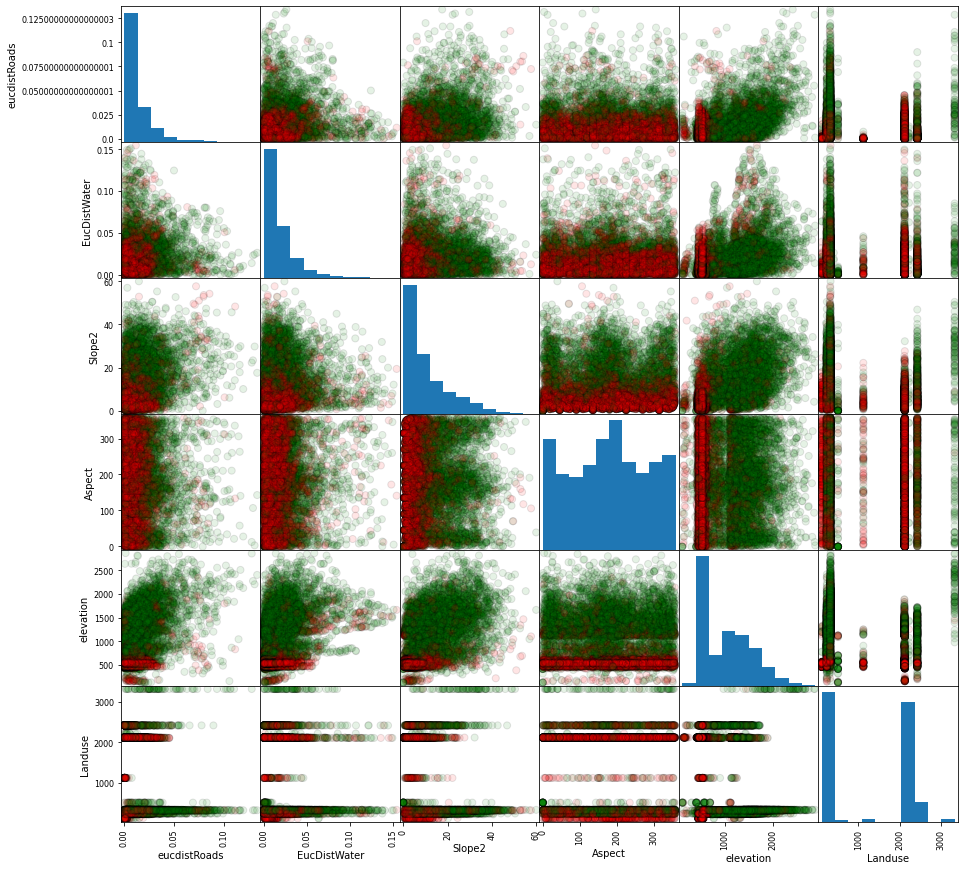

In [6]:
color_list = ['red' if i==1 else 'green' for i in data.loc[:,'Fire']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'Fire'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.1,
                                       s = 200,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()

LİNEAR SCV ALGORİTMASI İLE AĞİTİLEN VERİNİN ÇIKTISI

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
       
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
      

from sklearn.svm import LinearSVC

model = LinearSVC(loss='hinge', dual=True)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 77.65%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.727677     0.848101  0.776533     0.787889      0.788601
recall        0.875276     0.680098  0.776533     0.777687      0.776533
f1-score      0.794681     0.754865  0.776533     0.774773      0.774538
support    3175.000000  3251.000000  0.776533  6426.000000   6426.000000
Test Result:
Accuracy Score: 77.81%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.743605     0.829137  0.778141     0.786371      0.785315
recall        0.865344     0.686523  0.778141     0.775933      0.778141
f1-score      0.799869     0.751120  0.778141     0.775495      0.776096
support    1411.000000  1343.000000  0.778141  2754.000000   2754.000000


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Text(0.5, 15.0, 'Predicted label')

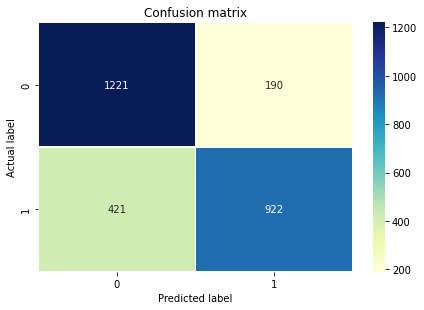

In [8]:
y_pred = model.predict(X_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred)


sns.heatmap(cm, annot=True,linewidths=0.5, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

RANDOM FORREST CLASSİFİER ALGORİTMASI İLE EĞİTİLEN VERİNİN ÇIKTISI 

In [9]:
RFC = ske.RandomForestClassifier(n_estimators=300, random_state = 42)       
RFC.fit(X_train, y_train)                # Burada sınıflandırıcıyı eğitiyoruz. TRAIN SETI KULLANILMALI.
accuracy = RFC.score(X_test, y_test)*100.0     # Burada, accuracy skoru hesaplanıyor. TEST SETI KULLANILMALI.

# predict the results
y_predtrain = RFC.predict(X_train)
y_predtest = RFC.predict(X_test)

# view accuracy
print("Training Accuracy:",accuracy_score(y_train, y_predtrain)*100.0)
print("Testing Accuracy:",accuracy_score(y_test, y_predtest)*100.0)

Training Accuracy: 100.0
Testing Accuracy: 85.69353667392883


Text(0.5, 15.0, 'Predicted label')

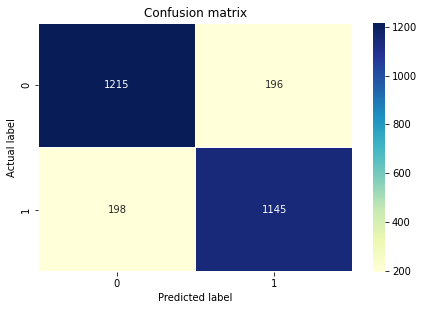

In [10]:
y_pred = RFC.predict(X_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred)


sns.heatmap(cm, annot=True,linewidths=0.5, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

XGBOOST CLASSİFİER İLE EĞİTİLEN VERİNİN ÇIKTISI 

In [11]:
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import accuracy_score

xg_reg = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 20, alpha = 10, n_estimators = 200)  # XGBRegressor   XGBClassifier
xg_reg.fit(X_train,y_train)


# predict the results
y_predtrain = xg_reg.predict(X_train)
y_predtest = xg_reg.predict(X_test)

# view accuracy
print("Training Accuracy:",accuracy_score(y_train, y_predtrain)*100.0)
print("Testing Accuracy:",accuracy_score(y_test, y_predtest)*100.0)

Training Accuracy: 100.0
Testing Accuracy: 85.039941902687


Text(0.5, 15.0, 'Predicted label')

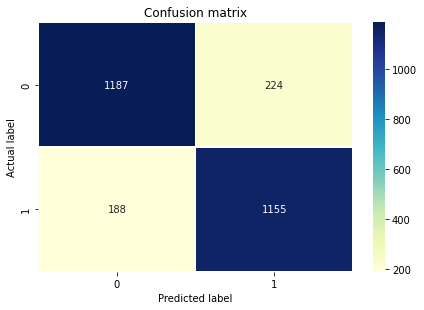

In [12]:
y_pred = xg_reg.predict(X_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred)


sns.heatmap(cm, annot=True,linewidths=0.5, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

MLP CLASSİFİER İLE EĞİTİLEN VERİNİN ÇIKTISI

In [13]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(100,100,100, ))
MLP.fit(X_train, y_train)
accuracy = MLP.score(X_test, y_test)*100.0

# predict the results
y_predtrain = MLP.predict(X_train)
y_predtest = MLP.predict(X_test)

# view accuracy
print("Training Accuracy:",accuracy_score(y_train, y_predtrain)*100.0)
print("Testing Accuracy:",accuracy_score(y_test, y_predtest)*100.0)

Training Accuracy: 76.84407096171803
Testing Accuracy: 77.01525054466231


Text(0.5, 15.0, 'Predicted label')

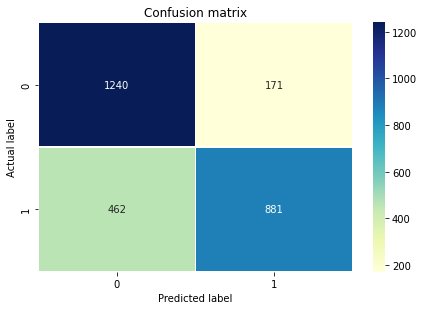

In [14]:
y_pred = MLP.predict(X_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred)


sns.heatmap(cm, annot=True,linewidths=0.5, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

SUPPORT VECTOR MACHİNE İLE EĞİTİLEN VERİNİN ÇIKTISI 

In [15]:
from sklearn import svm 
SVM = svm.SVC()
SVM.fit(X_train,y_train)

# predict the results
y_predtrain = SVM.predict(X_train)
y_predtest = SVM.predict(X_test)

# view accuracy
print("Training Accuracy:",accuracy_score(y_train, y_predtrain))
print("Testing Accuracy:",accuracy_score(y_test, y_predtest))

Training Accuracy: 0.8134142545907251
Testing Accuracy: 0.8068264342774146


In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
 
svm = SVC(random_state = 1)
svm.fit(X_train,y_train)

# predict the results
y_predtrain = svm.predict(X_train)
y_predtest = svm.predict(X_test)

# view accuracy
print("Training Accuracy:",accuracy_score(y_train, y_predtrain))
print("Testing Accuracy:",accuracy_score(y_test, y_predtest))

Training Accuracy: 0.8134142545907251
Testing Accuracy: 0.8068264342774146


In [17]:
list_accure = []
for i in range(1,1000):
  svm = SVC(C=i,random_state=1)
  svm.fit(X_train,y_train)
  list_accure.append(svm.score(X_test,y_test))

In [18]:
max(list_accure)

0.8242556281771968

In [19]:
index = list_accure.index(max(list_accure))
print(index)

975


Text(0.5, 15.0, 'Predicted label')

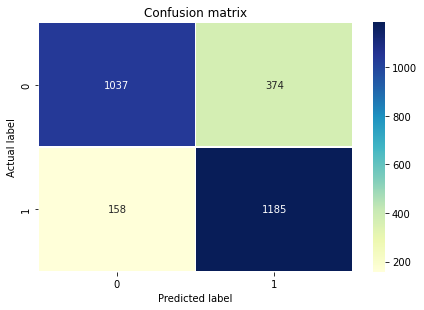

In [20]:
y_pred = SVM.predict(X_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred)


sns.heatmap(cm, annot=True,linewidths=0.5, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
from sklearn.ensemble import RandomForestClassifier

clf= RandomForestClassifier(max_depth=200,n_estimators=200,random_state=0)
model=clf.fit(X_train,y_train)

# predict the results
y_predtrain = clf.predict(X_train)
y_predtest = clf.predict(X_test)

# view accuracy
print("Training Accuracy:",accuracy_score(y_train, y_predtrain))
print("Testing Accuracy:",accuracy_score(y_test, y_predtest))

Training Accuracy: 1.0
Testing Accuracy: 0.8583877995642701


In [22]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=200, random_state=1)
regr = MLPRegressor(random_state=1, max_iter=100).fit(X_train, y_train)
#regr.predict(x_test[:2])
regr.score(X_test, y_test)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


-6.007676922980258

In [23]:
import pickle 
saved_model = pickle.dump(RFC, open('ForestModelOld.pickle','wb'))

In [24]:
RFC.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [26]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 20)]
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(15, 35, num = 7)]
max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split = [2, 3, 5]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                }
print(random_grid)

{'n_estimators': [100, 110, 121, 131, 142, 152, 163, 173, 184, 194, 205, 215, 226, 236, 247, 257, 268, 278, 289, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [15, 18, 21, 25, 28, 31, 35, None], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 2, 4]}


In [27]:
param_grid = {
                'sgdclassifier__learning_rate':['constant','optimal','invscaling'],
                'sgdclassifier__eta0':[0.0,0.01,0.1,0.3,0.5,0.7],
                'sgdclassifier__alpha':[0.0001,0.001,0.01,0.1]}

In [28]:
RFC = RandomizedSearchCV(estimator = RFC, param_distributions = random_grid, 
                                n_iter = 50, cv = 3, verbose=2, random_state=42)
# Fit the random search model
RFC.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=215; total time=   2.3s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=215; total time=   2.3s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=215; total time=   2.3s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=236; total time=   2.6s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=236; total time=   2.6s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=236; total time=   2.6s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=278; total time=   3.0s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=27

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_estimators=300,
                                                    random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [15, 18, 21, 25, 28, 31,
                                                      35, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [100, 110, 121, 131,
                                                         142, 152, 163, 173,
                                                         184, 194, 205, 215,
                                                         226, 236, 247, 257,
                                                         268, 278, 289, 300]},
                   random_state=42, verbose=2)

In [29]:
RFC.best_params_

{'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

In [35]:
RFC = ske.RandomForestClassifier(n_estimators = 300, min_samples_split = 5, min_samples_leaf = 1, max_features = 'sqrt',
                                      max_depth = 15, bootstrap = True)

In [36]:
RFC.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_features='sqrt', min_samples_split=5,
                       n_estimators=300)

In [37]:
y_pred1 = RFC.predict(X_test)

In [38]:
random_model_accuracy1 = round(RFC.score(X_train, y_train)*100,2)
print(round(random_model_accuracy1, 2), '%')

97.34 %


In [39]:
random_model_accuracy2 = round(RFC.score(X_test, y_test)*100,2)
print(round(random_model_accuracy2, 2), '%')

85.4 %
